In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

#Imported the required libraries.

In [188]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [189]:
df.shape

(614, 13)

we have 614 rows and 13 columns in the dataset.

In [190]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

we have indipendent variables in object,int and float64 types and target variable "Loan_Status" in Object type.

In [191]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Checked all the columns present in our Dataset.

In [192]:
df.describe()
#statistical summary

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [193]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Checked for missing values and we have missing values in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History.

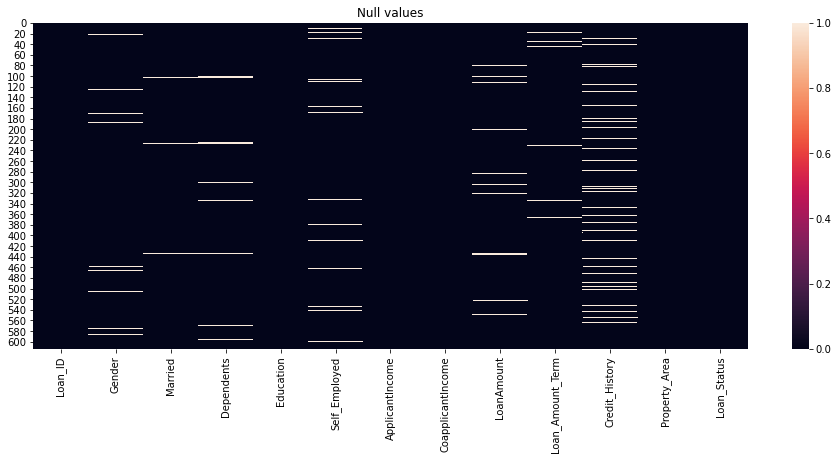

In [194]:
import seaborn as sns
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

Checked the missing values by using heatmap.

### Exploratory Data Analysis

process of performing initial investigations on data to discover patterns, to spot anomalies and and to check assumptions with the help of summary statistics and graphical representations.

In [195]:
print('Percent of missing "Gender" records is %.2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))

Percent of missing "Gender" records is 2.12%


In the dataset we have 2.12% missing gender records. 

Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

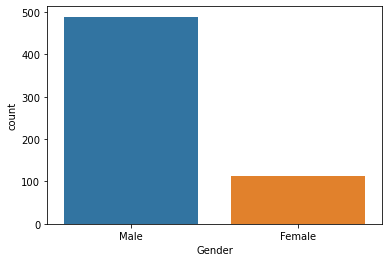

In [196]:
print("Number of people who take a loan group by gender :")
print(df['Gender'].value_counts())
sns.countplot(df['Gender'])

So we have 489 Male and 112 Female taking loan.

Number of people who take a loan group by Martial status :
Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

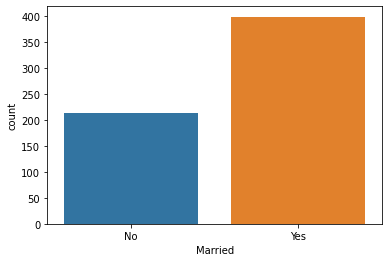

In [197]:
print("Number of people who take a loan group by Martial status :")
print(df['Married'].value_counts())
sns.countplot(df['Married'])

Here we have 398 married people and 213 not married people taking loan.

Number of people who take a loan group by Dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

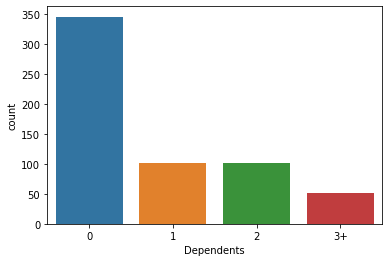

In [198]:
print("Number of people who take a loan group by Dependents :")
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'])

Here 345 people have no dependents and 102 people have 1 dependent and 101 people have 2 dependents and 51 people have more than 3 dependents.

Number of people who take a loan group by Education :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

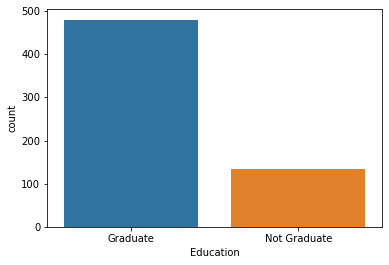

In [199]:
print("Number of people who take a loan group by Education :")
print(df['Education'].value_counts())
sns.countplot(df['Education'])

    Here we can see 480 people who are Graduate applied for laon and 134 are not Graduate but applied for loan.

Number of people who take a loan group by Self_Employed :
No     500
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

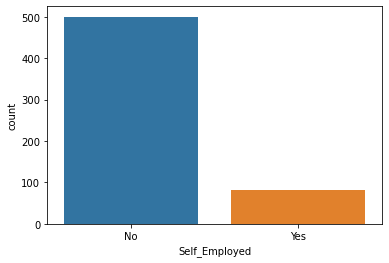

In [200]:
print("Number of people who take a loan group by Self_Employed :")
print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'])

Here 82 people who are Self_Employed applied for loan and 500 people who are not Self_Employed applied for loan.

Number of people who take a loan group by Credit_History :
1.0    475
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

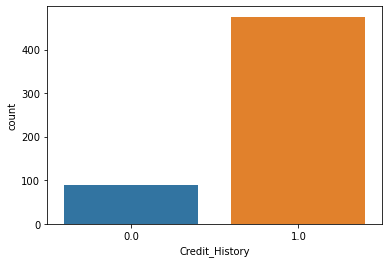

In [201]:
print("Number of people who take a loan group by Credit_History :")
print(df['Credit_History'].value_counts())
sns.countplot(df['Credit_History'])

Here 475 people have credit history and 89 people doesn't have credit history.

In [202]:
print('Percent of missing "LoanAmount" records is %.2f%%' %((df['LoanAmount'].isnull().sum()/df.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

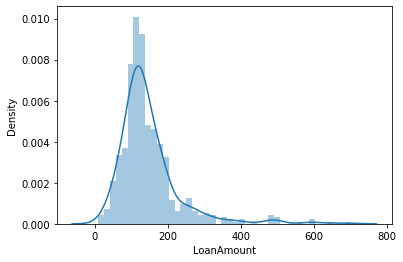

In [203]:
sns.distplot(df['LoanAmount'])

In [204]:
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((df['Loan_Amount_Term'].isnull().sum()/df.shape[0])*100))

Percent of missing "Loan_Amount_Term" records is 2.28%


Number of people who take a loan group by Loan_Amount_Term :
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

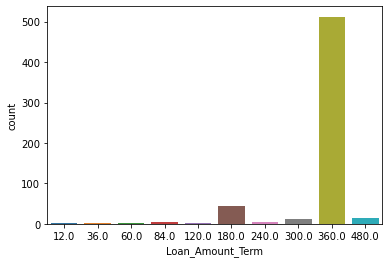

In [205]:
print("Number of people who take a loan group by Loan_Amount_Term :")
print(df['Loan_Amount_Term'].value_counts())
sns.countplot(df['Loan_Amount_Term'])

Here we can see 512 people have taken loan for 360.0 term and  44 people taken laon for the term 180 and 15 people 480.00 term, 13 people 300 term and 4 people 84 term, 4 people 240.00 term and 3 people 120 term, 2 poeple 36.00 and 60.00 term and 1 person for 12 term.

## Cross-Tabulation

A cross-tabulation is a two or more dimensional table that records the number of respondents that have the specific characteristics described in the cells of the table.¶

<AxesSubplot:xlabel='Gender'>

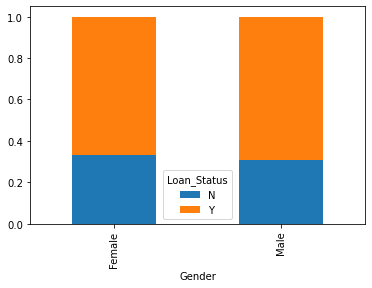

In [206]:
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

As we can see here the loan approved and non-approved for both Males and Females are almost equal.

<AxesSubplot:xlabel='Married'>

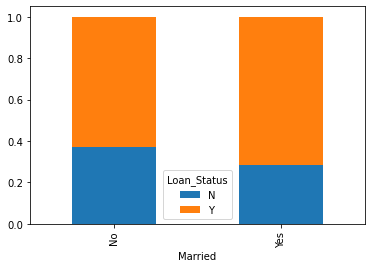

In [207]:
Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

As we can see here the married one's have applied for loans in more number.

<AxesSubplot:xlabel='Education'>

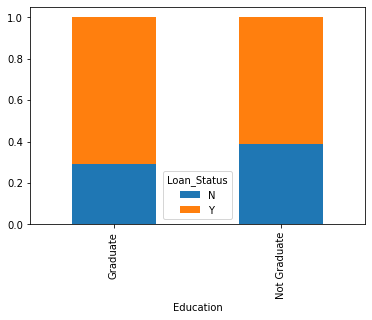

In [208]:
Education = pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

As we can see here for non-graduates the loan was not approved in more number as compared to Graduates.

<AxesSubplot:xlabel='Self_Employed'>

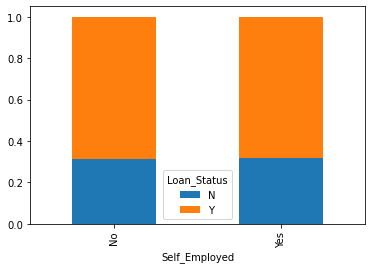

In [209]:
Self_Employed = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Here we can see that it doesn't matter if the applicant is self employed or not but the loan is equally approved.

<AxesSubplot:xlabel='Credit_History'>

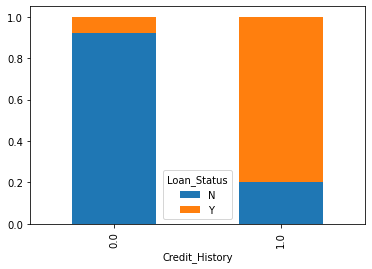

In [210]:
Credit_History = pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Here we can see the people who have good credit history have got loan approved in big number. 

In [211]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Loan_ID - 0%
Gender - 2%
Married - 0%
Dependents - 2%
Education - 0%
Self_Employed - 5%
ApplicantIncome - 0%
CoapplicantIncome - 0%
LoanAmount - 4%
Loan_Amount_Term - 2%
Credit_History - 8%
Property_Area - 0%
Loan_Status - 0%


From this we can know what percentage of missing data in our dataset.

In [212]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [213]:
df = df.drop('Loan_ID',axis=1)

Dropping the column Loan_ID as this not required for approving the loan.

In [214]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


Checking the correlation of our dataset.

### Feature Creation

Feature creation is a part of machine learning that mixes the existing features to form a new feature. for this dataset the new feature is total income which is formed by adding Applicant Income and Coapplicant Income, it helps generate new derived features with more predictive power than the originals. We can perform feature creation by means of addition, subtraction, multiplication, and ratio.


In [215]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


By adding the Applicant Income and Coapplicant Income have formed new column Total Income.

#### Replacing all the Text values with 0 and 1 for better analysis

In [216]:
df['Gender'].replace("Male",1,inplace=True)
df['Gender'].replace("Female",0,inplace=True)
df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,1.0,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
6,1.0,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
7,1.0,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
8,1.0,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0
9,1.0,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0


In [217]:
df['Married'].replace("Yes",1,inplace=True)
df['Married'].replace("No",0,inplace=True)
df.head(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,1.0,1.0,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [218]:
df['Education'].replace("Graduate",1,inplace=True)
df['Education'].replace("Not Graduate",0,inplace=True)
df.head(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1.0,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1.0,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1.0,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1.0,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,1.0,1.0,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [219]:
df['Self_Employed'].replace("Yes",1,inplace=True)
df['Self_Employed'].replace("No",0,inplace=True)
df.head(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [220]:
df['Dependents'].replace("3+",3,inplace=True)
df.head(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [221]:
df['Loan_Status'].replace("Y",1,inplace=True)
df['Loan_Status'].replace("N",0,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [222]:
df['Property_Area'].replace("Rural",1,inplace=True)
df['Property_Area'].replace("Urban",3,inplace=True)
df['Property_Area'].replace("Semiurban",2,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,3,1,5849.0
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0,6091.0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,3,1,3000.0
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,1,4941.0
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,3,1,6000.0


Here we replaced Property_Area if the area is Rural replaced with 1, If area is Urban replaced with 3 and If area is Semiurban replaced with 2.

In [223]:
y=df.Loan_Status
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Stored the target Loan_Status in variable y.

In [224]:
df.pop('Loan_Status')
df['Loan_Status']=y

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,3,5849.0,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,6091.0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,3,3000.0,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,4941.0,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,3,6000.0,1


### Checking Correlation

Correlation is a statistical measure that expresses the extent to which two variables are linearly related. It’s a common tool for describing relationships without making a statement about cause and effect.

<AxesSubplot:>

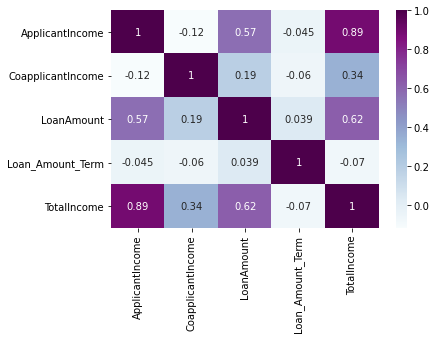

In [225]:
corr = df.corr()
heatmap_df=corr.drop(['Gender','Loan_Status','Property_Area','Credit_History','Self_Employed','Education','Married']).drop(['Gender','Loan_Status','Property_Area','Credit_History','Self_Employed','Education','Married'],axis=1)
sns.heatmap(heatmap_df,annot = True, cmap='BuPu')

In [226]:
df['LoanAmount'].median()
#Finding the median value of the LoanAmount.

128.0

In [227]:
df['Loan_Amount_Term'].median()
#Finding the median value of the Loan_Amount_Term

360.0

<AxesSubplot:>

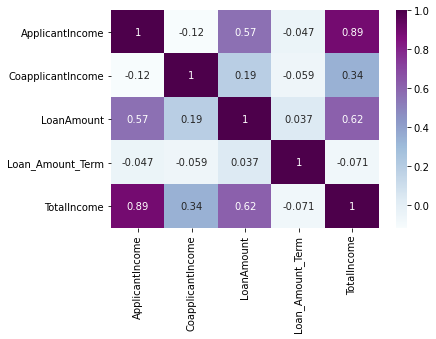

In [228]:
df['LoanAmount'].fillna(128, inplace=True)
df['Loan_Amount_Term'].fillna(360, inplace=True)
corr = df.corr()
heatmap_df=corr.drop(['Gender','Loan_Status','Property_Area','Credit_History','Self_Employed','Education','Married']).drop(['Gender','Loan_Status','Property_Area','Credit_History','Self_Employed','Education','Married'],axis=1)
sns.heatmap(heatmap_df,annot = True, cmap='BuPu')
#Filling the LoanAmount and Loan_Amount_Term with mean of 128 and 360.

#### We have missing values for Gender,Married, Dependents, Self_Employed etc as per above data . We can consider these methods to fill the missing values

1.For numerical variables: imputation using median                                                                              
2.For categorical variables: imputation using mode

In [229]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [230]:
df['CoapplicantIncome'].replace(0,1,inplace=True)

In [231]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalIncome          0
Loan_Status          0
dtype: int64

Now we have have missing value treated list.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

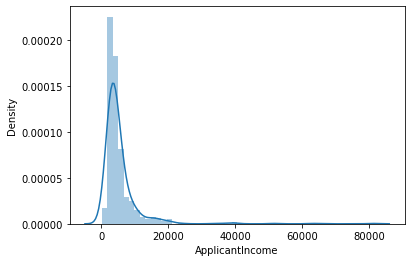

In [232]:
sns.distplot(df['ApplicantIncome'],label="Applicant Income analysis")

Graphical representation of ApplicantIncome.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

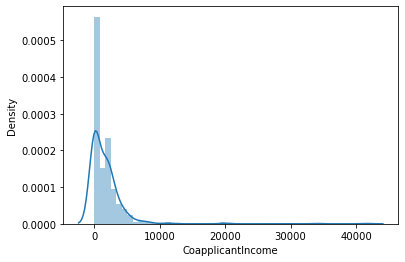

In [233]:
sns.distplot(df['CoapplicantIncome'],label="CoapplicantIncome analysis")

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

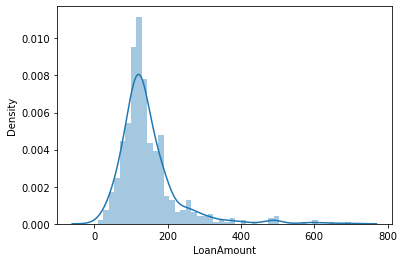

In [234]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

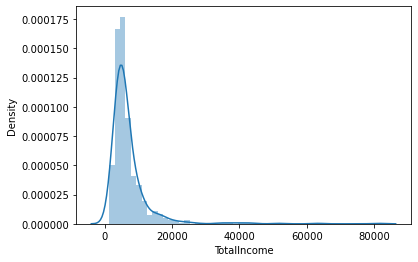

In [235]:
sns.distplot(df['TotalIncome'])

In [236]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.781759,0.133550,5403.459283,1621.690423,145.752443,342.410423,0.855049,2.037459,7024.705081,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.001661,84.107233,64.428629,0.352339,0.787482,6458.663872,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,1.000000,9.000000,12.000000,0.000000,1.000000,1442.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,1.000000,100.250000,360.000000,1.000000,1.000000,4166.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,2.000000,5416.500000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,7521.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,81000.000000,1.000000


### Class Imbalance

In [237]:
df["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

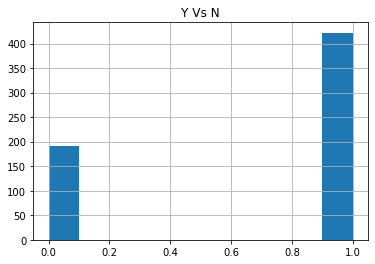

In [238]:
df["Loan_Status"].hist(grid=True)
plt.title("Y Vs N")
plt.show()

We have class imbalance in our target variable.

In [239]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.493110
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
TotalIncome          5.633449
Loan_Status         -0.809998
dtype: float64

Checking for the skewness in our dataset. The skewness range is from +0.5 to -0.5.

Since we have categorical columns in our dataset, we need to remove skewness only from numerical columns.

### Used Log Tranformer method for removing skewness from numerical columns.

In [240]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome']=np.log(df['CoapplicantIncome'])
df['TotalIncome']=np.log(df['TotalIncome'])
df['LoanAmount']=np.log(df['LoanAmount'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

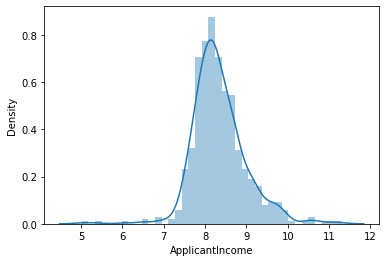

In [241]:
sns.distplot(df['ApplicantIncome'],label="Applicant Income analysis")

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

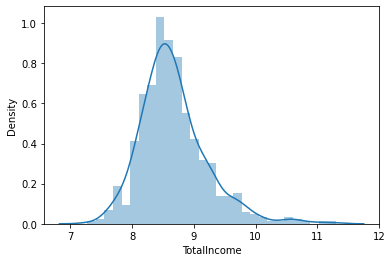

In [242]:
sns.distplot(df['TotalIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

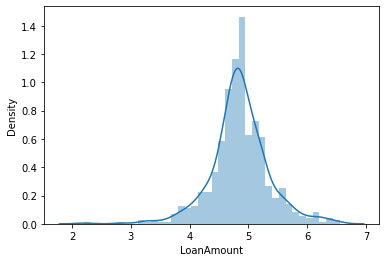

In [243]:
sns.distplot(df['LoanAmount'])

In [244]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      0.479580
CoapplicantIncome   -0.172951
LoanAmount          -0.195355
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
TotalIncome          1.076702
Loan_Status         -0.809998
dtype: float64

As we can see above the skewness on numerical column is removed.

In [245]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,1.0,0.0,0,1,0.0,8.674026,0.000000,4.852030,360.0,1.0,3,8.674026,1
1,1.0,1.0,1,1,0.0,8.430109,7.318540,4.852030,360.0,1.0,1,8.714568,0
2,1.0,1.0,0,1,1.0,8.006368,0.000000,4.189655,360.0,1.0,3,8.006368,1
3,1.0,1.0,0,0,0.0,7.856707,7.765569,4.787492,360.0,1.0,3,8.505323,1
4,1.0,0.0,0,1,0.0,8.699515,0.000000,4.948760,360.0,1.0,3,8.699515,1


In [246]:
y=df.Loan_Status
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [247]:
df.pop('Loan_Status')
df['Loan_Status']=y

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,1.0,0.0,0,1,0.0,8.674026,0.000000,4.852030,360.0,1.0,3,8.674026,1
1,1.0,1.0,1,1,0.0,8.430109,7.318540,4.852030,360.0,1.0,1,8.714568,0
2,1.0,1.0,0,1,1.0,8.006368,0.000000,4.189655,360.0,1.0,3,8.006368,1
3,1.0,1.0,0,0,0.0,7.856707,7.765569,4.787492,360.0,1.0,3,8.505323,1
4,1.0,0.0,0,1,0.0,8.699515,0.000000,4.948760,360.0,1.0,3,8.699515,1


In [248]:
#Separating Target variable attribute from other attributes
y = df.iloc[:,-1] 
x=df.iloc[:,0:12]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1.0,0.0,0,1,0.0,8.674026,0.000000,4.852030,360.0,1.0,3,8.674026
1,1.0,1.0,1,1,0.0,8.430109,7.318540,4.852030,360.0,1.0,1,8.714568
2,1.0,1.0,0,1,1.0,8.006368,0.000000,4.189655,360.0,1.0,3,8.006368
3,1.0,1.0,0,0,0.0,7.856707,7.765569,4.787492,360.0,1.0,3,8.505323
4,1.0,0.0,0,1,0.0,8.699515,0.000000,4.948760,360.0,1.0,3,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,7.972466,0.000000,4.262680,360.0,1.0,1,7.972466
610,1.0,1.0,3,1,0.0,8.320205,0.000000,3.688879,180.0,1.0,1,8.320205
611,1.0,1.0,1,1,0.0,8.996157,5.480639,5.533389,360.0,1.0,3,9.025456
612,1.0,1.0,2,1,0.0,8.933664,0.000000,5.231109,360.0,1.0,3,8.933664


In [249]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Handling class imbalance problem by Oversampling the minority class

In [250]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [251]:
y_over.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

## Creating the Model using Logistic Regression

In [252]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= None)

In [253]:
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(460, 12)

(460,)

(154, 12)

(154,)

#### Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.¶


In [254]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept = False, C = 1e9)
lr.fit(x_train,y_train)

LogisticRegression(C=1000000000.0, fit_intercept=False)

In [255]:
y_pred=lr.predict(x_test)

In [256]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int64)

### Confusion Matrix

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.


In [257]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 20,  26],
       [  7, 101]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

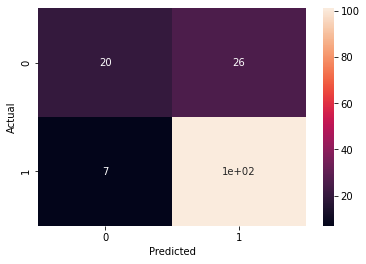

In [258]:
cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

In [259]:
accuracyScore = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ',accuracyScore)
print('Accuracy In Percentage : ', int(accuracyScore*100), '%')

Accuracy Score :  0.7857142857142857
Accuracy In Percentage :  78 %


In [260]:
print(lr.coef_, lr.intercept_)

[[-3.17634718e-02  6.95502086e-01  1.22406930e-01  5.46599823e-01
   3.25008298e-01  3.28062843e-01  7.24948405e-02 -5.36354603e-01
   3.80517955e-04  4.71178012e+00  1.08448481e-01 -5.90020727e-01]] [0.]


In [261]:
X = df[['Credit_History', 'CoapplicantIncome','Loan_Amount_Term']]
X.head()

,Credit_History,CoapplicantIncome,Loan_Amount_Term
0,1.0,0.000000,360.0
1,1.0,7.318540,360.0
2,1.0,0.000000,360.0
3,1.0,7.765569,360.0
4,1.0,0.000000,360.0


In [262]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.25, random_state= None)

In [263]:
display(X_train.head(), X_test.head(), Y_train.head(), Y_test.head())

,Credit_History,CoapplicantIncome,Loan_Amount_Term
316,1.0,0.000000,360.0
590,1.0,8.136226,180.0
189,1.0,0.000000,180.0
404,1.0,0.000000,360.0
248,1.0,7.519150,480.0


,Credit_History,CoapplicantIncome,Loan_Amount_Term
350,1.0,0.000000,360.0
119,1.0,0.000000,360.0
354,1.0,6.224558,360.0
483,1.0,0.000000,360.0
470,1.0,7.639642,360.0


316    1
590    1
189    1
404    0
248    1
Name: Loan_Status, dtype: int64

350    1
119    1
354    1
483    1
470    1
Name: Loan_Status, dtype: int64

In [264]:
lr1 = LogisticRegression(fit_intercept = False, C = 1e9)
lr1.fit(X_train,Y_train)

LogisticRegression(C=1000000000.0, fit_intercept=False)

In [265]:
Y_pred=lr1.predict(X_test)

In [266]:
cnf_matrix1 = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix1

array([[ 25,  22],
       [  4, 103]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

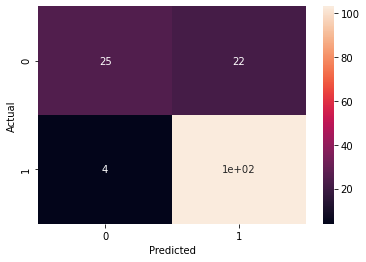

In [267]:
cnf_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

In [268]:
accuracyScore = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy Score : ',accuracyScore)
print('Accuracy In Percentage : ', int(accuracyScore*100), '%')

Accuracy Score :  0.8311688311688312
Accuracy In Percentage :  83 %


Logistic regression gives us an accuracy of 78% and after we select our 3 main features with the higest scores we got accuracy of 83.11%.

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size= 0.30, random_state= 45)

In [270]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7913385826771654
[[ 98  21]
 [ 32 103]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       119
           1       0.83      0.76      0.80       135

    accuracy                           0.79       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.79      0.79      0.79       254



In [271]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8661417322834646
[[ 95  24]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       119
           1       0.84      0.93      0.88       135

    accuracy                           0.87       254
   macro avg       0.87      0.86      0.86       254
weighted avg       0.87      0.87      0.87       254



In [272]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test, ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.468503937007874
[[119   0]
 [135   0]]
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       119
           1       0.00      0.00      0.00       135

    accuracy                           0.47       254
   macro avg       0.23      0.50      0.32       254
weighted avg       0.22      0.47      0.30       254



#### Checking the CROSS VALIDATION score all the models

In [273]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of LogisticRegression model :",scr.mean())

Cross validation score of LogisticRegression model : 0.809462881514061


In [274]:
scr=cross_val_score(dt, x, y, cv=5)
print("Cross validation score of DecisionTree model :",scr.mean())

Cross validation score of DecisionTree model : 0.7312674930027988


In [275]:
scr=cross_val_score(rf, x, y, cv=5)
print("Cross validation score of RandomForest model :",scr.mean())

Cross validation score of RandomForest model : 0.7850593096094896


In [276]:
scr=cross_val_score(svc, x, y, cv=5)
print("Cross validation score of SVC model :",scr.mean())

Cross validation score of SVC model : 0.6872984139677463


 Minimum difference in accuracy and cross validation score is for LogisticRegression so this is our best model

### Hyper parameter Tuning

In [277]:
from sklearn.model_selection import GridSearchCV

In [286]:
#LogisticRegressionClassifier
parameters = {'random_state':[3,4,6],
              'tol':[2.0, 3.0],
              'C':[4.0, 3.0],
              'intercept_scaling':[2.0, 3.0]}

In [287]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [288]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [4.0, 3.0], 'intercept_scaling': [2.0, 3.0],
                         'random_state': [3, 4, 6], 'tol': [2.0, 3.0]})

In [291]:
#Printing the best parameter found by GridSearchCV
GCV.best_params_ 

{'C': 4.0, 'intercept_scaling': 2.0, 'random_state': 3, 'tol': 3.0}

In [294]:
mod=LogisticRegression(C=4.0,intercept_scaling=2.0,random_state=3,tol=3.0)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.28346456692913


In [296]:
import joblib
joblib.dump(mod, "LoanPredictCOPY.pkl")

['LoanPredictCOPY.pkl']